In [83]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("MS_Dhoni_ODI_record.csv.")
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   score        350 non-null    object
 1   runs_scored  350 non-null    object
 2   balls_faced  350 non-null    object
 3   strike_rate  350 non-null    object
 4   fours        350 non-null    object
 5   sixes        350 non-null    object
 6   opposition   350 non-null    object
 7   ground       350 non-null    object
 8   date         350 non-null    object
 9   odi_number   350 non-null    object
dtypes: object(10)
memory usage: 27.5+ KB


In [86]:
# simple Data cleaning operation
df['opposition'] = df['opposition'].apply(lambda x : x[2:])
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [87]:

# Converting the date column into the column of date object
df['date'] = pd.to_datetime(df['date'], dayfirst = True)

# Casting the df['date'].dt.year into integer
df['year'] = df['date'].dt.year.astype(int)

df.head()


,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005


In [88]:
# Batting average = (Total runs scored) / (Innings count - Not outs count)

In [89]:

# We want pandas to treat the score column as string column
df['score'] = df['score'].apply(str)

# if the score content ends with the *, the column should contain 1 else it should contain 0
df['not_out'] = np.where(df['score'].str.endswith("*"), 1, 0)


df.head()


,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0


In [90]:

# Dropping the unnecessary columns
df = df.drop(columns = ["odi_number"])

df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [91]:

# dropping specific row of match in which the DNB or TDNB values are present
df_new = df.loc[((df['score'] != "DNB") & (df['score'] != "TDNB")), 'runs_scored':]
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [92]:

# fixing the data types of numerical columns
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)

In [93]:

# Career stats

first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y') # First match
print(f"First match : {first_match_date}")
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y') # last match
print(f"Last match : {last_match_date}")

number_of_matches = df.shape[0] # number of matches played in carrer
print(f"Number of matches played: {number_of_matches}")

number_of_inns = df_new.shape[0] # number of innings
print(f"Number of Innings: {number_of_inns}")

not_outs = df_new['not_out'].sum() # not out number
print(f"Number of not outs : {not_outs}")

runs_scored = df_new['runs_scored'].sum() # runs count
print(f"Number of runs scored : {runs_scored}")

balls_faced = df_new['balls_faced'].sum() # balls faced
print(f"Number of balls faced : {balls_faced}")

career_sr = (runs_scored / balls_faced) * 100 # Carrer strike rate

career_avg = (runs_scored / (number_of_inns - not_outs)) # Carrer average

print(f"Carrer strike rate: {career_sr}")
print(f"Career average : {career_avg}")

hundreds = (df_new['runs_scored'] >= 100).sum()
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
print(f"Hundreds: {hundreds}")
print(f"Fifties: {fifties}")

sixes = df_new['sixes'].sum()
fours = df_new['fours'].sum()
print(f"Sixes : {sixes}")
print(f"Fours : {fours}")

First match : December 23, 2004
Last match : July 09, 2019
Number of matches played: 350
Number of Innings: 297
Number of not outs : 84
Number of runs scored : 10773
Number of balls faced : 12303
Carrer strike rate: 87.56400877834675
Career average : 50.57746478873239
Hundreds: 10
Fifties: 73
Sixes : 229
Fours : 826


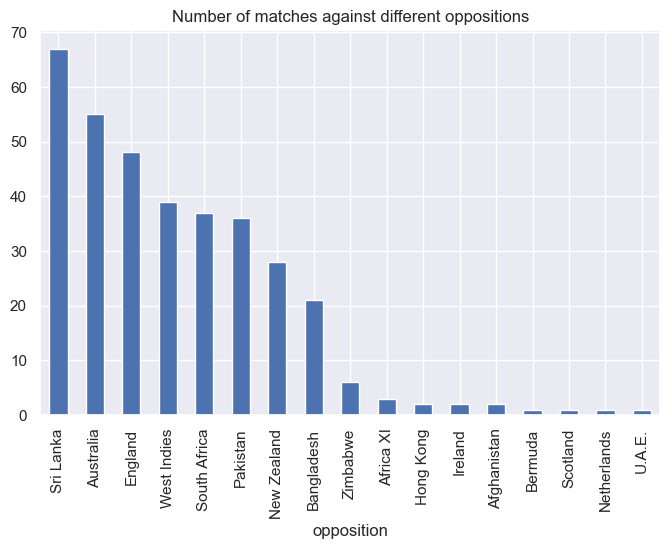

In [94]:


# Visualizations 
# how many matches played against perticular team

opposition_counts = df['opposition'].value_counts()

opposition_counts.plot(kind = 'bar', 
                       title = 'Number of matches against different oppositions',
                       figsize = (8, 5))
plt.show()

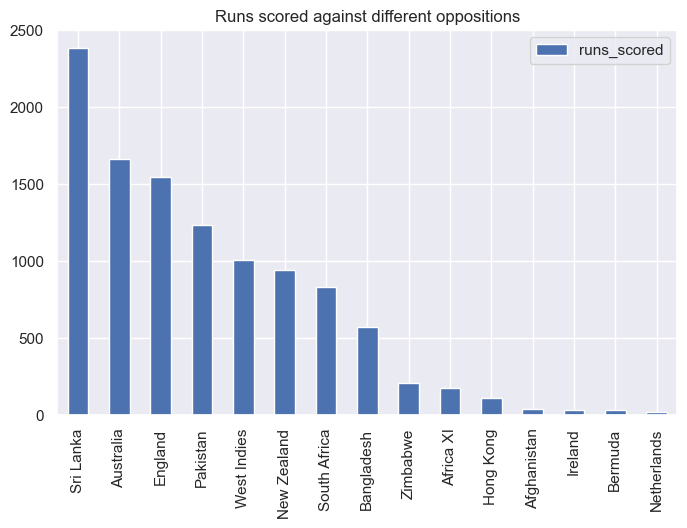

In [95]:

# Group the dataFrame by 'opposition' column
grouped_by_opposition = df_new.groupby('opposition')

# Sum the 'runs_scored' column for each group
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
# print(sum_of_runs_scored)

# The sum_of_runs_scored is a series with a labellled index, which is opposition
# Convert it into a DataFrame and remove the index
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.sort_values(by = "runs_scored", 
                                      ascending = False).plot(x = 'opposition', 
                                                              kind = 'bar',
                                                              title = 'Runs scored against different oppositions',
                                                              figsize = (8, 5))
plt.xlabel(None);
plt.show()

# Day 5 Work

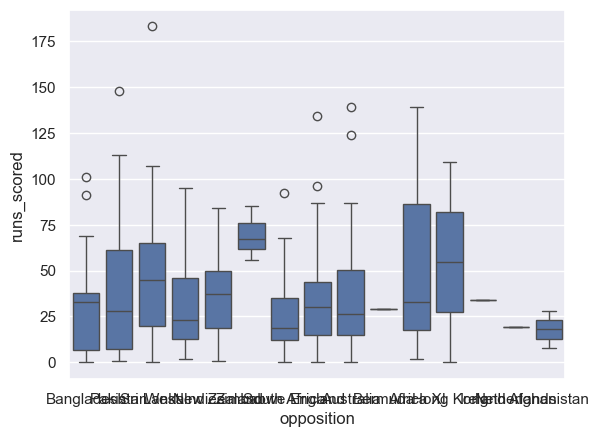

In [97]:
# Box plot of work against various oppositions

sns.boxplot(x='opposition', y='runs_scored', data=df_new)
plt.show()

In [98]:
# Looks crowded = Let us retain only major countries
# List of oppositions to filter
opposition_list = [' England', 'Australia', 'West Indies', 'South Africa', 'New Zealand', 'Pakistan', 'Sri Lanka', 'Bangladesh']
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [99]:
# Filter rows where 'opposition' is in the list
check = df_new['opposition'].isin(opposition_list)
print(check)
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]
# Sort the filtered DataFrame in desending order of 'runs_scored'
df_filtered = df_filtered.sort_values(by='runs_scored', ascending=False)
df_filtered

0       True
1       True
2       True
3       True
4       True
       ...  
344    False
345     True
346    False
347     True
349     True
Name: opposition, Length: 297, dtype: bool


,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
21,183,145,126.20,15,10,Sri Lanka,Jaipur,2005-10-31,2005,1
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
228,139,121,114.87,12,5,Australia,Mohali,2013-10-19,2013,1
146,124,107,115.88,9,3,Australia,Nagpur,2009-10-28,2009,0
211,113,125,90.40,7,3,Pakistan,Chennai,2012-12-30,2012,1
...,...,...,...,...,...,...,...,...,...,...
171,0,1,0.00,0,0,Australia,Visakhapatnam,2010-10-20,2010,0
339,0,1,0.00,0,0,Australia,Nagpur,2019-03-05,2019,0
74,0,4,0.00,0,0,South Africa,Belfast,2007-06-29,2007,0
68,0,1,0.00,0,0,Sri Lanka,Port of Spain,2007-03-23,2007,0


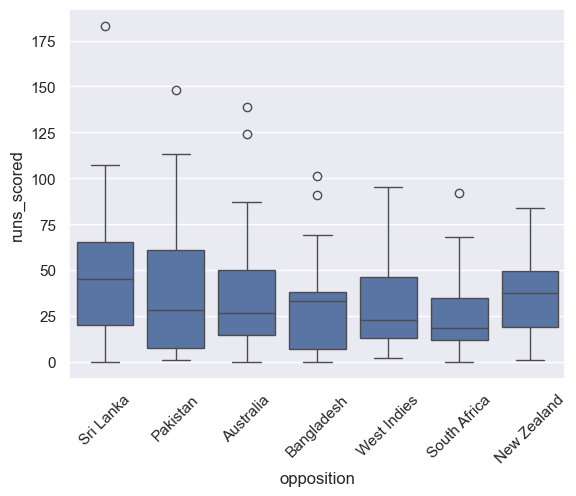

In [100]:
#Rewdraw boxplot but on filtered opposition list
sns.boxplot(x='opposition', y='runs_scored', data=df_filtered)
plt.xticks(rotation=45)
plt.show()

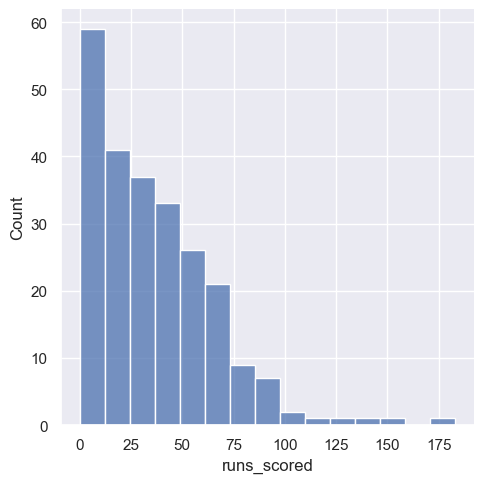

In [101]:
# histogram (distplot) with and without kde (Kernel density)
sns.displot(data=df_filtered, x='runs_scored', kde=False)
plt.show()

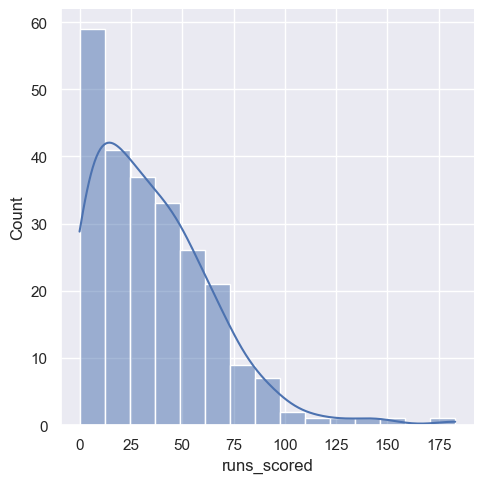

In [102]:
#We see that there is a right/positive skew
sns.displot(data=df_filtered, x='runs_scored', kde= True)
plt.show()

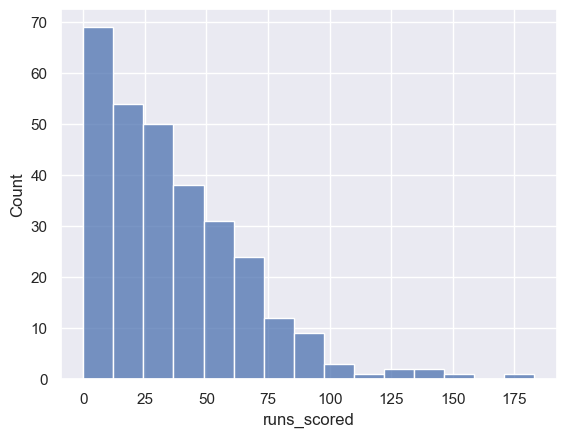

In [103]:
# histogram with bins
sns.set(style='darkgrid')
sns.histplot(data= df_new,x='runs_scored', bins=15)
plt.show()

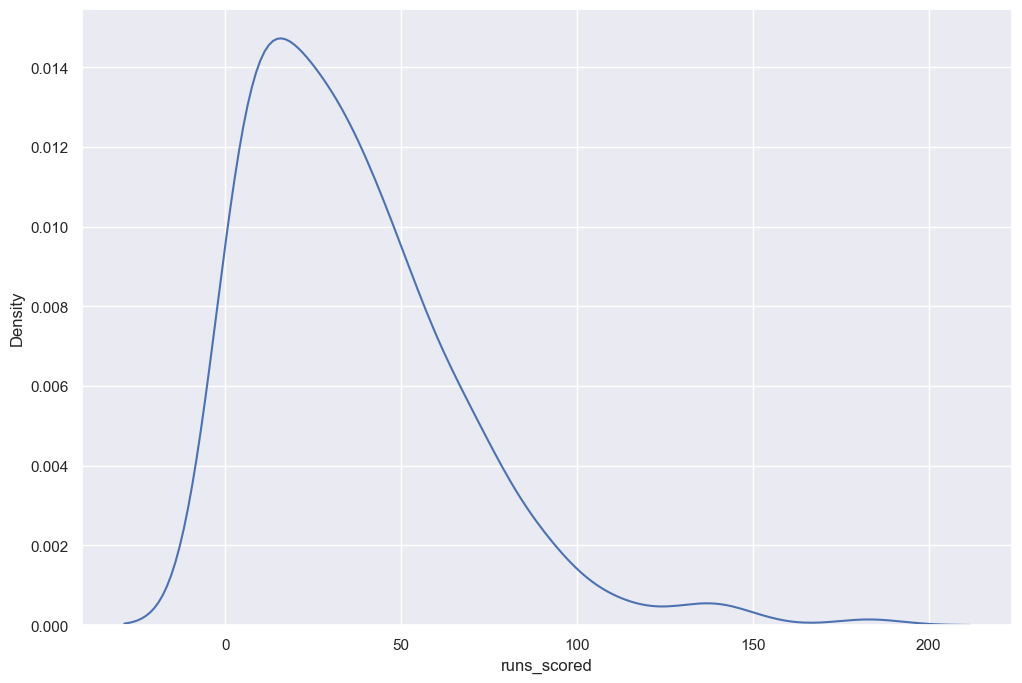

In [104]:
# Kde plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new, x='runs_scored')
plt.show()

<Axes: xlabel='runs_scored', ylabel='Density'>

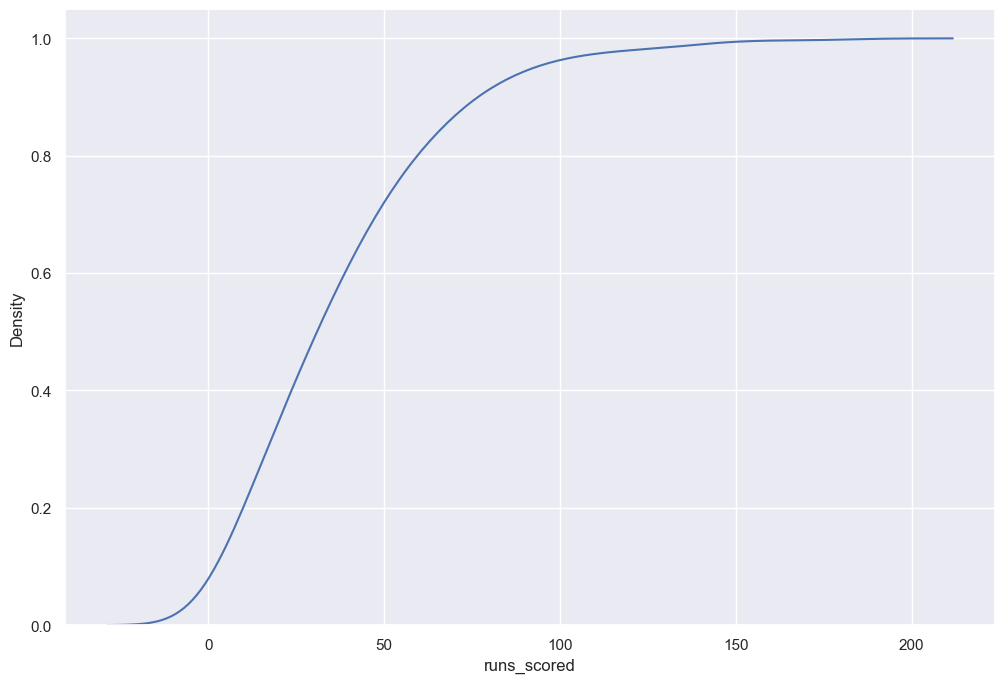

In [105]:
# Kde plot with cumulative probability
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new, x='runs_scored', cumulative=True)

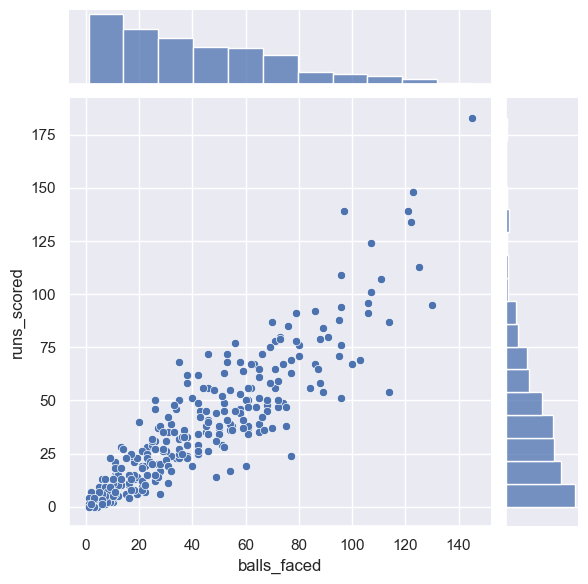

In [106]:
# jointplot - variation of scatter plot
sns.jointplot(x='balls_faced', y='runs_scored', data=df_new, kind='scatter')
plt.show()

In [107]:
# Heat map
#Calculate the correleation matrix
correlation_matrix = df_new[['balls_faced', 'runs_scored']].corr()

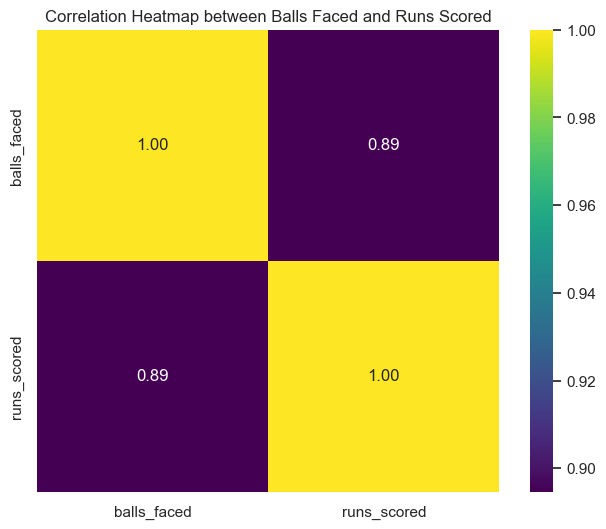

In [108]:
# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation_matrix, annot= True, cmap='viridis', square= True, fmt=".2f")
plt.title('Correlation Heatmap between Balls Faced and Runs Scored')
plt.show()

In [111]:
# Create the heatmap

#Calculate the correleation matrix
grouped_opposition = df_filtered.groupby("opposition")


In [113]:
# Aggregating 'balls faced' and runs_scored using sum
agg_sum = groupled_opposition.agg({'balls_faced' : 'sum', 'runs_scored': 'sum'})

# Assigning the result to df_strike_rate
df_strike_rate = agg_sum

#Calculate strike rate
df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored']/
                                df_strike_rate['balls_faced']) *100

# Bad graph - strike rate scale is different from runs scored and balls faced
sns.heatmap(df_strike_rate, linewidth = 0.5, annot= True, fmt=".0f", cmap= viridis)

NameError: name 'groupled_opposition' is not defined